## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
mouse_count=len(mouse_data["Mouse ID"].value_counts())
mouse_count

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_data[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data["Mouse ID"]=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=mouse_data.loc[mouse_data["Mouse ID"]!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean=clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median=clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance=clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sd=clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem=clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df= pd.DataFrame({"Tumor Volume Mean":mean,
                          "Tumor Volume Median":median,
                          "Tumor Volume Variance":variance,
                          "Tumor Volume SD":sd,
                          "Tumor Volume SEM":sem})
summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

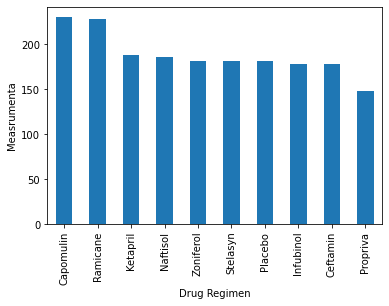

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements=clean_df['Drug Regimen'].value_counts()

measurements.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Measrumenta")
plt.show()


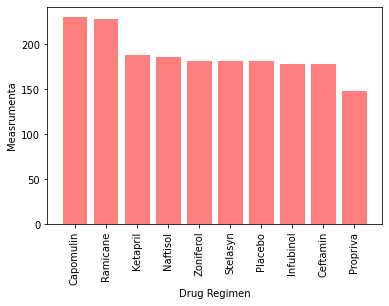

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(measurements.index.values, measurements.values, color='r', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Measrumenta")
plt.xticks(rotation="vertical")
plt.show()


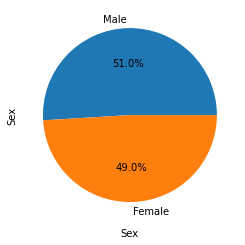

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts=clean_df['Sex'].value_counts()

sex_counts.plot(kind="pie",autopct='%1.1f%%')
plt.xlabel("Sex")
plt.show()


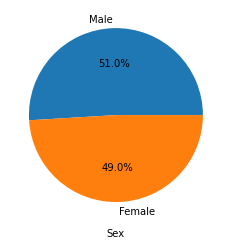

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts.values, labels=sex_counts.index.values,autopct='%1.1f%%')
plt.xlabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_treatment=clean_df['Drug Regimen'].value_counts()
capomulin= clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

ramicane= clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
ramicane
infubinol= clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
infubinol
ceftamin= clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]
ceftamin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [27]:
# Start by getting the last (greatest) timepoint for each mouse
#capomulin
capo_max = capomulin.groupby("Mouse ID").max()["Timepoint"]
capo_vol = pd.DataFrame(capo_max)
capo_merge = pd.merge(capo_vol , clean_df, on=("Mouse ID","Timepoint"),how="left")
capo_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [28]:
capo_tumors = capo_merge["Tumor Volume (mm3)"]

quartiles =capo_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile apomulin tumor: {lowerq}")
print(f"Upper quartile capomulin tumors: {upperq}")
print(f"Interquartile Capomulin tumor: {iqr}")
print(f"Median of Capomulin tumor: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"{lower_bound} could be outliers.")
print(f"{upper_bound} could be outliers.")

Lower quartile apomulin tumor: 32.37735684
Upper quartile capomulin tumors: 40.1592203
Interquartile Capomulin tumor: 7.781863460000004
Median of Capomulin tumor: 38.125164399999996 
20.70456164999999 could be outliers.
51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [43]:
#Ramicane
remi_max =ramicane.groupby("Mouse ID").max()["Timepoint"]
remi_vol = pd.DataFrame(remi_max)
remi_merge = pd.merge(capo_vol , clean_df, on=("Mouse ID","Timepoint"),how="left")
remi_merge
remi_tumors = remi_merge["Tumor Volume (mm3)"]

quartiles =remi_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile of Ramicane tumor: {lowerq}")
print(f"Upper quartile of Ramicane tumor: {upperq}")
print(f"Interquartile of Ramicane tumors is: {iqr}")
print(f"Median of Ramicane tumo: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Below {lower_bound} could be outliers.")
print(f"Above {upper_bound} could be outliers.")

Lower quartile of Ramicane tumor: 32.37735684
Upper quartile of Ramicane tumor: 40.1592203
Interquartile of Ramicane tumors is: 7.781863460000004
Median of Ramicane tumo: 38.125164399999996 
Below 20.70456164999999 could be outliers.
Above 51.83201549 could be outliers.


In [30]:
#infubinol
inf_max =infubinol.groupby("Mouse ID").max()["Timepoint"]
inf_vol = pd.DataFrame(inf_max)
inf_merge = pd.merge(capo_vol , clean_df, on=("Mouse ID","Timepoint"),how="left")
inf_merge

inf_tumors = inf_merge["Tumor Volume (mm3)"]

quartiles =inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile of infubinol tumor: {lowerq}")
print(f"Upper quartile of infubinole tumor: {upperq}")
print(f"Interquartile range of infubinoltumor: {iqr}")
print(f"Median of infubinol tumor: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Below {lower_bound} could be outliers.")
print(f"Above {upper_bound} could be outliers.")

Lower quartile of infubinol tumor: 32.37735684
Upper quartile of infubinole tumor: 40.1592203
Interquartile range of infubinoltumor: 7.781863460000004
Median of infubinol tumor: 38.125164399999996 
Below 20.70456164999999 could be outliers.
Above 51.83201549 could be outliers.


In [31]:
#ceftamin
cef_max =ceftamin.groupby("Mouse ID").max()["Timepoint"]
cef_vol = pd.DataFrame(cef_max)
ceftamin_merge = pd.merge(capo_vol , clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge

cef_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles =cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Lower quartile of ceftamin tumor: {lowerq}")
print(f"Upper quartile of ceftamin tumor : {upperq}")
print(f"Interquartile range of ceftamin: {iqr}")
print(f"Median of ceftamin tumor: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Below {lower_bound} could be outliers.")
print(f"Above {upper_bound} could be outliers.")

Lower quartile of ceftamin tumor: 32.37735684
Upper quartile of ceftamin tumor : 40.1592203
Interquartile range of ceftamin: 7.781863460000004
Median of ceftamin tumor: 38.125164399999996 
Below 20.70456164999999 could be outliers.
Above 51.83201549 could be outliers.


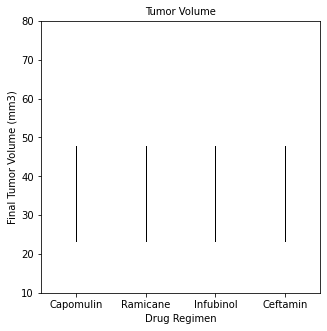

In [32]:
data_plot = [capo_tumors, remi_tumors, inf_tumors, cef_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.set_title('Tumor Volume',fontsize =10)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 10)
ax1.set_xlabel('Drug Regimen',fontsize = 10)
ax1.boxplot(data_plot, labels=Regimen, widths = 0., patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x401_df = capomulin.loc[capomulin["Mouse ID"] == "x401",:]
x401_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


Text(0, 0.5, 'Tumor Volume')

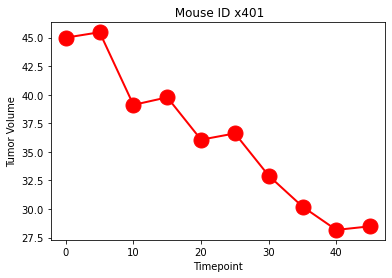

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
forline_df = capomulin.loc[capomulin["Mouse ID"] == "x401",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title(' Mouse ID x401')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red", label="Fahreneit")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

## Correlation and Regression

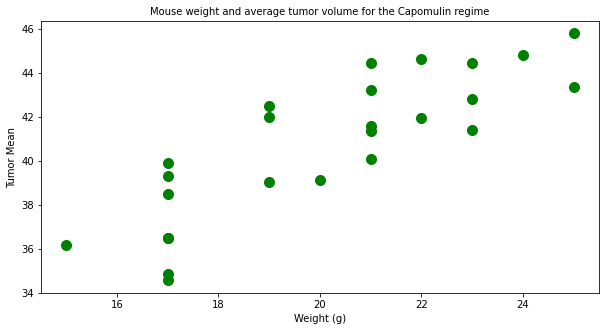

In [37]:
fig1, ax1 = plt.subplots(figsize=(10, 5))
mean_camp =capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(mean_camp['Weight (g)'],mean_camp['Tumor Volume (mm3)'],s=100, color="green")
plt.title('Mouse weight and average tumor volume for the Capomulin regime',fontsize =10)
plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Tumor Mean',fontsize =10)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

NameError: name 'regress_values' is not defined

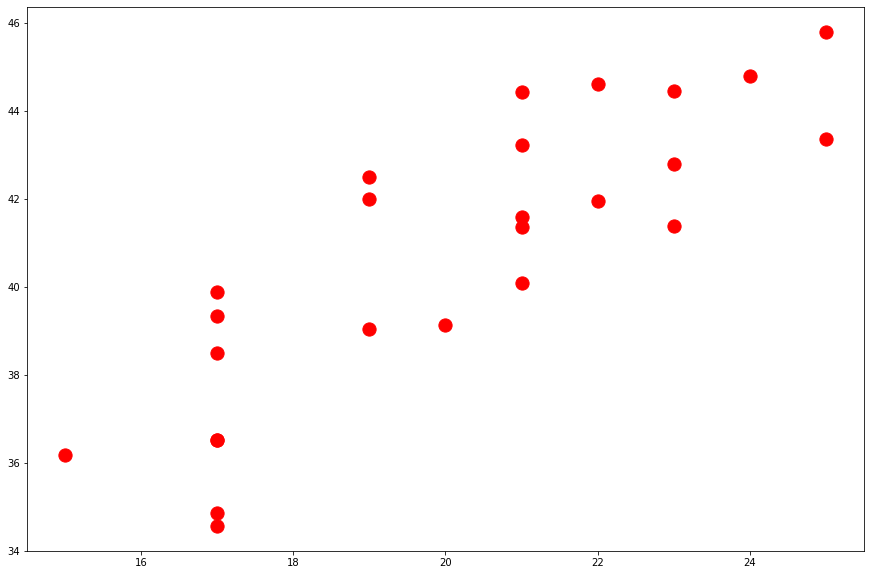

In [41]:
#Regression
fig1, ax1 = plt.subplots(figsize=(14, 8))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"r-")
plt.title('RegressionAverage Tumor Volume',fontsize =10)
plt.xlabel('Weight',fontsize =14)
plt.ylabel('Mean Tumore Volume (mm3)',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="green")

